In [1]:
import matplotlib.pyplot as plt
#import pandas and load data
import pandas as pd
file_to_load = "Instructions/HeroesOfPymoli/Resources/purchase_data.csv"
data = pd.read_csv(file_to_load)
data.head()
#data.describe()
#datadf.dtypes

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [4]:
#Get age group label for age

def get_age_group_label(age):
    int_age = int(age)
    age_group_label = ""
    if int_age<10:
        age_group_label = "0-10"
    elif int_age<15:
        age_group_label = "10-14"
    elif int_age<20:
        age_group_label = "15-19"
    elif int_age<25:
        age_group_label = "20-24"
    elif int_age<30:
        age_group_label = "25-29"
    elif int_age<35:
        age_group_label = "30-34"
    elif int_age<40:
        age_group_label = "35-39"
    elif int_age<45:
        age_group_label = "40-44"
    elif int_age>=45:
        age_group_label = "45+"
    else:
        age_group_label = "Unknown"
    return age_group_label

def get_age_group_order(age):
    int_age = int(age)
    age_group_order = 0
    if int_age<10:
        age_group_order = 0
    elif int_age<15:
        age_group_order = 1
    elif int_age<20:
        age_group_order = 2
    elif int_age<25:
        age_group_order = 3
    elif int_age<30:
        age_group_order = 4
    elif int_age<35:
        age_group_order = 5
    elif int_age<40:
        age_group_order = 6
    elif int_age<45:
        age_group_order = 7
    elif int_age>=45:
        age_group_order = 8
    else:
        age_group_order = 9
    return age_group_order

In [5]:
#Add Age Group and Age Group Order columns
data["Age Group"] = data["Age"].apply(get_age_group_label)
data["Age Group Order"] = data["Age"].apply(get_age_group_order)
datadf = pd.DataFrame(data)
datadf.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Group,Age Group Order
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,20-24,3
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56,40-44,7
2,2,Ithergue48,24,Male,92,Final Critic,4.88,20-24,3
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27,20-24,3
4,4,Iskosia90,23,Male,131,Fury,1.44,20-24,3


In [6]:
#Total number of players
unique_players = data["SN"].unique()
total_players = len(unique_players)
total_players

576

In [7]:
#Total purchase analysis
unique_items = len(data["Item Name"].unique())
average_price = round(data["Price"].mean(),2)
purchases = len(data)
total_revenue = data["Price"].sum()
total_purchase_data = {'Unique Items':[unique_items],
    'Average Price':[average_price],
    'Purchases':[purchases],
    'Total Revenue':[total_revenue]}
total_purchase_data_df = pd.DataFrame(total_purchase_data)
total_purchase_data_df["Average Price"] = total_purchase_data_df["Average Price"].astype(float).map('${:,.2f}'.format)
total_purchase_data_df["Total Revenue"] = total_purchase_data_df["Total Revenue"].astype(float).map('${:,.2f}'.format)
total_purchase_data_df

,Unique Items,Average Price,Purchases,Total Revenue
0,179,$3.05,780,"$2,379.77"


In [8]:
#Gender statistics

#Group by player and gender
gender_grouping = ["SN","Gender"]
gdf = datadf.copy()
gg = gdf.groupby(gender_grouping).agg({'SN':'count','Age':'mean','Price':'sum'})
gg = gg.rename(columns={'SN':'Purchases'})
gg["Purchases"] = gg["Purchases"].astype(int)
gg["Age"] = gg["Age"].astype(float)
gg["Price"] = gg["Price"].astype(float)
#Group by gender
gc = gg.groupby(["Gender"]).agg({'Purchases':'count','Age':'mean'})
gc = gc.rename(columns={'Purchases':'Players','Age':'Average Age'})
gc["Average Age"] = gc["Average Age"].astype(float).map("{:,.1f}".format)
#Add % players column
gc["% Players"] = ((gc["Players"]*100.0)/(total_players*1.0)).astype(float).map("{:,.2f}%".format)
gc

,Players,Average Age,% Players
Gender,,,
Female,81,21.3,14.06%
Male,484,23.0,84.03%
Other / Non-Disclosed,11,22.3,1.91%


In [9]:
#Gender Purchase Analysis
gp = pd.DataFrame(gg)
gp = gp.groupby(["Gender"]).agg({'Purchases':['sum','count'],'Price':['sum','mean'],})
gp.columns = ["_".join(x) for x in gp.columns.ravel()]
gp = gp.rename(columns={'Purchases_sum':'Purchases','Purchases_count':'Players','Price_sum':'Total Sales','Price_mean':'Average Total Sale per Person'})
gp["Average Purchase Price"] = (gp["Total Sales"]/(gp["Purchases"]*1.0)).astype(float)
gp["Purchases"] = gp["Purchases"].astype(int)
gp["Total Sales"] = gp["Total Sales"].astype(float)
gp["Average Total Sale per Person"] = gp["Average Total Sale per Person"].astype(float)

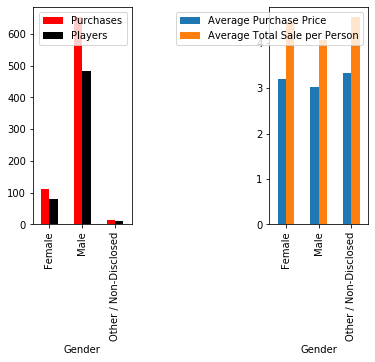

In [10]:
#Gender Purchase Charts
fig = plt.figure()
ax = fig.add_subplot(131)
gp_int = gp.loc[:,['Purchases','Players']]
gp_int.plot(kind='bar',color=["red","black"],ax=ax)
ax2 = fig.add_subplot(133)
gp_price = gp.loc[:,['Average Purchase Price','Average Total Sale per Person']]
gp_price.plot(kind='bar',ax=ax2)

In [11]:
#Gender Purchase Text 
gp["Average Purchase Price"] = (gp["Total Sales"]/(gp["Purchases"]*1.0)).astype(float).map("${:,.2f}".format)
gp["Purchases"] = gp["Purchases"].astype(int)
gp["Total Sales"] = gp["Total Sales"].astype(float).map("${:,.2f}".format)
gp["Average Total Sale per Person"] = gp["Average Total Sale per Person"].astype(float).map("${:,.2f}".format)
gpa = gp.loc[:,["Purchases","Total Sales","Average Purchase Price","Average Total Sale per Person"]]
gpa

,Purchases,Total Sales,Average Purchase Price,Average Total Sale per Person
Gender,,,,
Female,113,$361.94,$3.20,$4.47
Male,652,"$1,967.64",$3.02,$4.07
Other / Non-Disclosed,15,$50.19,$3.35,$4.56


In [12]:
#Age Demographics by Case

#Group by player and age group
age_grouping = ["SN","Age Group"]
adf = datadf.copy()
adf["Age Group"] = adf["Age Group"].astype(str)
adf["Age Group Order"] = adf["Age Group Order"].astype(int)
ad = adf.groupby(age_grouping).agg({'SN':'count','Price':'sum','Age Group Order':'mean'})
ad = ad.rename(columns={"SN":"Purchases"})

In [13]:
ad["Purchases"] = ad["Purchases"].astype(int)
#Group by age group
ac = ad.groupby(["Age Group"]).agg({'Purchases':'count','Age Group Order':'mean'})
ac = ac.rename(columns={'Purchases':'Players'})
#Add % players column
ac["% Players"] = ((ac["Players"]*100.0)/(total_players*1.0)).astype(float).map("{:,.2f}%".format)
ac.sort_values("Age Group Order")
ac.loc[:,["Players","% Players"]]


,Players,% Players
Age Group,,
0-10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40-44,11,1.91%
45+,1,0.17%


In [15]:
#Age Demographics by Bins
#Tried bins and received AttributeError: 'DataFrame' object has no attribute 'cut'

bins=[0,10,15,20,25,30,35,40,120]
group_names = ["<10","10-14","15-19","20-24","25-29","30-34","35-39","40+"]
adf["Age Bin"] = pd.cut(adf["Age"], bins, labels=group_names)
adf

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price,Age Group,Age Group Order,Age Bin
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53,15-19,3,15-19
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56,35-39,7,35-39
2,2,Ithergue48,24,Male,92,Final Critic,4.88,20-24,3,20-24
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27,20-24,3,20-24
4,4,Iskosia90,23,Male,131,Fury,1.44,20-24,3,20-24
5,5,Yalae81,22,Male,81,Dreamkiss,3.61,20-24,3,20-24
6,6,Itheria73,36,Male,169,"Interrogator, Blood Blade of the Queen",2.18,35-39,6,35-39
7,7,Iskjaskst81,20,Male,162,Abyssal Shard,2.67,15-19,3,15-19
8,8,Undjask33,22,Male,21,Souleater,1.10,20-24,3,20-24
9,9,Chanosian48,35,Other / Non-Disclosed,136,Ghastly Adamantite Protector,3.58,30-34,6,30-34
